In [39]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from nltk.tokenize.treebank import TreebankWordDetokenizer
from tabulate import tabulate
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Read the data
df=pd.read_csv('news.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [36]:
# no null values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [37]:
#balanced dataset or not
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

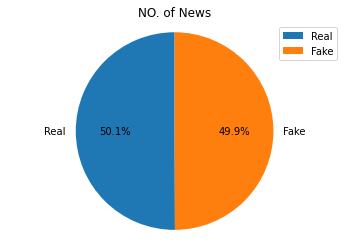

In [31]:
Tasks=df['label'].value_counts()
my_labels = 'Real','Fake'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('NO. of News')
plt.legend()
plt.axis('equal')
plt.show()

In [40]:
ps = WordNetLemmatizer()
stopwords = stopwords.words('english')
#preprocessing function
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using RegX
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    #token = row.split() 
    token=word_tokenize(row)
    # lemmatize the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleanned_news = ' '.join(news) 
    
    # return cleanned data
    return cleanned_news

In [7]:
#applying the preprocessing steps to the dataset
df['text'] = df['text'].apply(lambda x : cleaning_data(x))


In [8]:
print(df[['text','label']])


                                                   text label
0     daniel greenfield shillman journalism fellow f...  FAKE
1     google pinterest digg linkedin reddit stumbleu...  FAKE
2     u secretary state john f kerry said monday sto...  REAL
3     kaydee king kaydeeking november lesson tonight...  FAKE
4     primary day new york front runner hillary clin...  REAL
...                                                 ...   ...
6330  state department told republican national comm...  REAL
6331  p pb stand plutocratic pentagon posted oct wik...  FAKE
6332  anti trump protester tool oligarchy reform alw...  FAKE
6333  addis ababa ethiopia president obama convened ...  REAL
6334  jeb bush suddenly attacking trump matter jeb b...  REAL

[6335 rows x 2 columns]


In [9]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [10]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [11]:
#Logistic Regression
alg_name = []
alg_accuracy = []

lr=LogisticRegression()
lr.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred_lr=lr.predict(tfidf_test)
score_lr=accuracy_score(y_test,y_pred_lr)
print("Score",score_lr)
lr_perc=round(score_lr*100,2)
print("Accuracy:{}%".format(lr_perc))



Score 0.9179163378058406
Accuracy:91.79%


In [12]:
alg_name.append('Logistic Regression')
alg_accuracy.append(lr_perc)

In [13]:
#SUPPORT VECTOR MACHINE
svc = SVC()
svc.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred_svc=svc.predict(tfidf_test)
score_svc=accuracy_score(y_test,y_pred_svc)
print("Score:",score_svc)
svc_perc=round(score_svc*100,2)
print("Accuracy:{}%".format(svc_perc))




Score: 0.9273875295974744
Accuracy:92.74%


In [14]:
alg_name.append('Support vector machine')
alg_accuracy.append(svc_perc)

In [15]:
#MULTINOMIAL NAIVE BAYES
mnb = MultinomialNB()
mnb.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred_mnb=mnb.predict(tfidf_test)
score_mnb=accuracy_score(y_test,y_pred_mnb)
print("Score:",score_mnb)
mnb_perc=round(score_mnb*100,2)
print("Accuracy:{}%".format(mnb_perc))




Score: 0.8382004735595896
Accuracy:83.82%


In [16]:
alg_name.append('Multinomial Naive Bayes')
alg_accuracy.append(mnb_perc)

In [17]:
#DECISION TREE
dt = DecisionTreeClassifier()
dt.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred_dt=dt.predict(tfidf_test)
score_dt=accuracy_score(y_test,y_pred_dt)
print("Score:",score_dt)
dt_perc=round(score_dt*100,2)
print("Accuracy:{}%".format(dt_perc))




Score: 0.7971586424625099
Accuracy:79.72%


In [18]:
alg_name.append('Decision Tree')
alg_accuracy.append(dt_perc)

In [19]:
d = [["SVC", svc_perc],
     ["LR", lr_perc],
     ["MNB", mnb_perc],
     ["DT", dt_perc]]
print(tabulate(d, headers=["Classifier", "Accuracy"]))

Classifier      Accuracy
------------  ----------
SVC                92.74
LR                 91.79
MNB                83.82
DT                 79.72


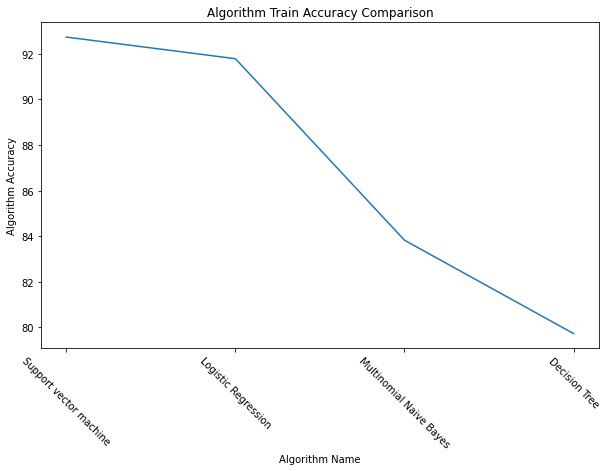

In [20]:
data = pd.DataFrame({'alg_name': alg_name, 'alg_accuracies': alg_accuracy})
sorted_data = data.reindex((data['alg_accuracies'].sort_values(ascending=False)).index.values)

plt.subplots(figsize=(10,6))
sns.lineplot(x=sorted_data['alg_name'], y=sorted_data['alg_accuracies'])
#sns.barplot(x=sorted_data['alg_name'], y=sorted_data['alg_accuracies'], palette = 'Paired')
plt.xticks(rotation=-45)
plt.xlabel('Algorithm Name')
plt.ylabel('Algorithm Accuracy')
plt.title('Algorithm Train Accuracy Comparison')
plt.show()

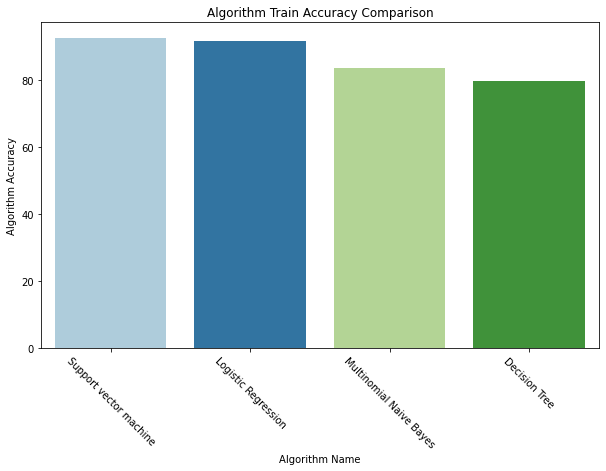

In [21]:
data = pd.DataFrame({'alg_name': alg_name, 'alg_accuracies': alg_accuracy})
sorted_data = data.reindex((data['alg_accuracies'].sort_values(ascending=False)).index.values)

plt.subplots(figsize=(10,6))
sns.barplot(x=sorted_data['alg_name'], y=sorted_data['alg_accuracies'], palette = 'Paired')
plt.xticks(rotation=-45)
plt.xlabel('Algorithm Name')
plt.ylabel('Algorithm Accuracy')
plt.title('Algorithm Train Accuracy Comparison')
plt.show()

In [22]:
#Build confusion matrix for logistic regression
confusion_matrix(y_test,y_pred_lr, labels=['FAKE','REAL'])

array([[600,  38],
       [ 66, 563]], dtype=int64)

In [23]:
#Build confusion matrix for support vector machine
confusion_matrix(y_test,y_pred_svc, labels=['FAKE','REAL'])

array([[604,  34],
       [ 58, 571]], dtype=int64)

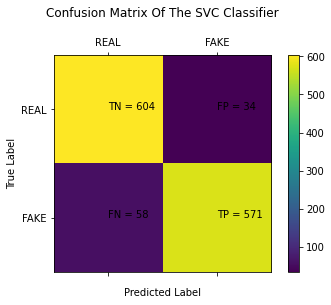

In [24]:
#Build confusion matrix for svc
confusion_matrix(y_test,y_pred_svc, labels=['FAKE','REAL'])
#conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = metrics.confusion_matrix(y_test, y_pred_svc)
labels = ['REAL', 'FAKE']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion Matrix Of The SVC Classifier\n')
fig.colorbar(cax)
tick_marks = np.arange(len(labels))
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label')
plt.xticks(tick_marks, labels, rotation=0)
plt.yticks(tick_marks, labels)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat[i][j]))
plt.show()

In [25]:
news = cleaning_data(str("Imposters posing as army personnel on the social media have been called out by the Indian Army as false news and disinformation."))

In [26]:
single_prediction = svc.predict(tfidf_vectorizer.transform([news]))
single_prediction = TreebankWordDetokenizer().detokenize(single_prediction)
print("News is",single_prediction)


News is FAKE


In [27]:
news_1 = cleaning_data(str("U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism."))
single_prediction = svc.predict(tfidf_vectorizer.transform([news_1]))
single_prediction = TreebankWordDetokenizer().detokenize(single_prediction)
print("News is",single_prediction)

News is REAL
